In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
from datetime import datetime, timedelta
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import math
import textblob as TextBlob
from textblob import TextBlob
import preprocessor as p

In [28]:
tweets1 = pd.read_csv('../Data/Tweet/tweetsfinal1.csv', encoding='ISO-8859-1', error_bad_lines = False, engine = 'python', header = None)

Skipping line 845142: unexpected end of data


In [29]:
tweets1.head(5)

,0,1
0,Thu Nov 09 17:43:41 EST 2017,RT @Forbes: The Failure of SegWit2x Shows Bitc...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."


In [30]:
tweets2 = pd.read_csv('../Data/Tweet/tweetsfinal2.csv', encoding='ISO-8859-1', error_bad_lines=False,engine = 'python',header = None) 

In [31]:
tweets2.head(5)

,0,1
0,Fri Nov 17 20:03:27 EST 2017,"1% #Bitcoin profits every 3 hours, every weekd..."
1,Fri Nov 17 20:03:27 EST 2017,What day will bitcoin break $10K??\rhttps://t....
2,Fri Nov 17 20:03:26 EST 2017,RT @SimplyVitalHQ: Our #HealthNexus technology...
3,Fri Nov 17 20:03:26 EST 2017,RT @BitcoinWrld: #Bitcoin Emerges as Crisis Cu...
4,Fri Nov 17 20:03:25 EST 2017,RT @SaraEisen: Bitcoin price up 95% or so sinc...


In [32]:
tweets3 = pd.read_csv('../Data/Tweet/tweetsfinal3.csv', encoding = 'ISO-8859-1', error_bad_lines = False, engine = 'python', header = None)

In [33]:
tweets3.head(5)

,0,1
0,Mon Nov 27 17:40:38 EST 2017,"RT @daneelproject: Another day, another high s..."
1,Mon Nov 27 17:40:38 EST 2017,RT @BankExProtocol: Be prepared to BKX #tokens...
2,Mon Nov 27 17:40:38 EST 2017,(Bitcoin Price Analysis: Bitcoin Tests Parabol...
3,Mon Nov 27 17:40:37 EST 2017,RT @daneelproject: Daneel uses a specially dev...
4,Mon Nov 27 17:40:36 EST 2017,RT @JacBurns_Comext: #Blockchain & Energy: her...


In [34]:
tweetsDF = pd.concat([tweets1,tweets2,tweets3], ignore_index = True)

In [35]:
tweetsDF.head(5)

,0,1
0,Thu Nov 09 17:43:41 EST 2017,RT @Forbes: The Failure of SegWit2x Shows Bitc...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."


In [36]:
tweetsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564353 entries, 0 to 2564352
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       object
dtypes: object(2)
memory usage: 39.1+ MB


<h2>1. Giai đoạn tiền xử lý dữ liệu

<h3>1.1 Xóa dòng trống và làm sạch dòng tweet

In [37]:
# Xóa đi các thuộc tính trống
tweetsDF.dropna()

,0,1
0,Thu Nov 09 17:43:41 EST 2017,RT @Forbes: The Failure of SegWit2x Shows Bitc...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."
...,...,...
2564347,Mon Nov 20 13:40:17 EST 2017,"Bitcoin continues to crush it, breaks through ..."
2564348,Mon Nov 20 13:40:16 EST 2017,RT @charliebilello: Bitcoin's market cap just ...
2564349,Mon Nov 20 13:40:16 EST 2017,#CheckItOut as #AML bitcoin looks to test the ...
2564350,Mon Nov 20 13:40:16 EST 2017,CME's Bitcoin Futures Likely to Start Trading ...


In [38]:
tweetsDF.columns = ['DateTime','Tweet']

In [39]:
tweetsDF

,DateTime,Tweet
0,Thu Nov 09 17:43:41 EST 2017,RT @Forbes: The Failure of SegWit2x Shows Bitc...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."
...,...,...
2564348,Mon Nov 20 13:40:16 EST 2017,RT @charliebilello: Bitcoin's market cap just ...
2564349,Mon Nov 20 13:40:16 EST 2017,#CheckItOut as #AML bitcoin looks to test the ...
2564350,Mon Nov 20 13:40:16 EST 2017,CME's Bitcoin Futures Likely to Start Trading ...
2564351,Mon Nov 20 13:40:16 EST 2017,CME's Bitcoin Futures Likely to Start Trading ...


In [40]:
import preprocessor as p

In [45]:
# Làm sạch dữ liệu bằng thuộc tính clean trong module preprocessor 
def preprocess_tweet(row):
    Tweet = row['Tweet']
    Tweet = p.clean(Tweet)
    return Tweet

In [ ]:
tweetsDF['Tweet'] = tweetsDF.apply(preprocess_tweet, axis=1)

In [48]:
tweetsDF

,DateTime,Tweet
0,Thu Nov 09 17:43:41 EST 2017,The Failure of SegWit2x Shows Bitcoin is Digit...
1,Thu Nov 09 17:43:40 EST 2017,Lots of love from unknown miners. Miners are y...
2,Thu Nov 09 17:43:39 EST 2017,Warning: Built-in Keylogger Found in MantisTek...
3,Thu Nov 09 17:43:39 EST 2017,Join our telegram. All information about and p...
4,Thu Nov 09 17:43:39 EST 2017,"$DIGAF: FLOAT=16M, THE ""ONLY"" EXCHANGE ON THE ..."
...,...,...
2564345,Mon Nov 20 13:40:17 EST 2017,"tcoin continues to crush it, breaks through $8..."
2564346,Mon Nov 20 13:40:16 EST 2017,Bitcoin's market cap just passed McDonald's.Ye...
2564347,Mon Nov 20 13:40:16 EST 2017,bitcoin looks to test the waters with
2564348,Mon Nov 20 13:40:16 EST 2017,E's Bitcoin Futures Likely to Start Trading De...


<h3> 1.2 Format lại ngày

In [49]:
# Xóa 9 kí tj cuối của ngày tương ứng là " EST 2017"
tweetsDF['DateTime'] = tweetsDF['DateTime'].str[:-9]

In [50]:
tweetsDF.head(5)

,DateTime,Tweet
0,Thu Nov 09 17:43:41,The Failure of SegWit2x Shows Bitcoin is Digit...
1,Thu Nov 09 17:43:40,Lots of love from unknown miners. Miners are y...
2,Thu Nov 09 17:43:39,Warning: Built-in Keylogger Found in MantisTek...
3,Thu Nov 09 17:43:39,Join our telegram. All information about and p...
4,Thu Nov 09 17:43:39,"$DIGAF: FLOAT=16M, THE ""ONLY"" EXCHANGE ON THE ..."


In [51]:
# Xóa 4 kí tự đầu tương đương với xóa thứ trong Datetime
tweetsDF['DateTime'] = tweetsDF['DateTime'].str[4:]

In [52]:
tweetsDF.head(5)

,DateTime,Tweet
0,Nov 09 17:43:41,The Failure of SegWit2x Shows Bitcoin is Digit...
1,Nov 09 17:43:40,Lots of love from unknown miners. Miners are y...
2,Nov 09 17:43:39,Warning: Built-in Keylogger Found in MantisTek...
3,Nov 09 17:43:39,Join our telegram. All information about and p...
4,Nov 09 17:43:39,"$DIGAF: FLOAT=16M, THE ""ONLY"" EXCHANGE ON THE ..."


In [53]:
tweetsDF['DateTime'] = tweetsDF['DateTime'].str.replace('Nov ','2017-11-')

In [54]:
tweetsDF.head(5)

,DateTime,Tweet
0,2017-11-09 17:43:41,The Failure of SegWit2x Shows Bitcoin is Digit...
1,2017-11-09 17:43:40,Lots of love from unknown miners. Miners are y...
2,2017-11-09 17:43:39,Warning: Built-in Keylogger Found in MantisTek...
3,2017-11-09 17:43:39,Join our telegram. All information about and p...
4,2017-11-09 17:43:39,"$DIGAF: FLOAT=16M, THE ""ONLY"" EXCHANGE ON THE ..."


In [55]:
tweetsDF['DateTime'] = tweetsDF['DateTime'].str.replace('Oct ','2017-10-')

In [56]:
tweetsDF.tail(5)

,DateTime,Tweet
2564345,2017-11-20 13:40:17,"tcoin continues to crush it, breaks through $8..."
2564346,2017-11-20 13:40:16,Bitcoin's market cap just passed McDonald's.Ye...
2564347,2017-11-20 13:40:16,bitcoin looks to test the waters with
2564348,2017-11-20 13:40:16,E's Bitcoin Futures Likely to Start Trading De...
2564349,2017-11-20 13:40:16,E's Bitcoin Futures Likely to Start Trading De...


In [57]:
# Chuyển Datetime về dạng yyyy-mm--dd hh-mm--ss
tweetsDF['DateTime'] = pd.to_datetime(tweetsDF['DateTime'], format='%y-%m-%d %H:%M:%S', infer_datetime_format=True)

In [58]:
tweetsDF.head(5)

,DateTime,Tweet
0,2017-11-09 17:43:41,The Failure of SegWit2x Shows Bitcoin is Digit...
1,2017-11-09 17:43:40,Lots of love from unknown miners. Miners are y...
2,2017-11-09 17:43:39,Warning: Built-in Keylogger Found in MantisTek...
3,2017-11-09 17:43:39,Join our telegram. All information about and p...
4,2017-11-09 17:43:39,"$DIGAF: FLOAT=16M, THE ""ONLY"" EXCHANGE ON THE ..."


In [59]:
# Sắp xếp tăng dần theo datetime
tweetsDF = tweetsDF.sort_values(by="DateTime")

In [60]:
tweetsDF.head(5)

,DateTime,Tweet
845140,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...
845139,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...
845138,2017-10-31 00:00:35,tcoin value: $6132.78
845137,2017-10-31 00:00:35,e price of bitcoin on is now USD
845136,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves


<h2> 2. Đánh giá cảm xúc của bài Tweet

In [24]:
import textblob as TextBlob
from textblob import TextBlob

In [64]:
def getSubjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return 0
def getPolarity (text):
    try:
        return TextBlob(text).sentiment.polarity 
    except:
        return 0

tweetsDF['Subjectivity'] = tweetsDF['Tweet'].apply(getSubjectivity)
tweetsDF['Polarity'] = tweetsDF['Tweet'].apply(getPolarity)

tweetsDF

,DateTime,Tweet,Subjectivity,Polarity
845140,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...,0.0000,0.00
845139,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...,0.0000,0.00
845138,2017-10-31 00:00:35,tcoin value: $6132.78,0.0000,0.00
845137,2017-10-31 00:00:35,e price of bitcoin on is now USD,0.0000,0.00
845136,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves,0.0000,0.00
...,...,...,...,...
1681212,2017-11-27 17:40:36,"Now people are searching for ""buy bitcoin"" mor...",0.5000,0.50
1681210,2017-11-27 17:40:37,Daneel uses a specially developed algorithm to...,0.2125,0.05
1681208,2017-11-27 17:40:38,Be prepared to BKX . Answer about wallet you w...,0.0000,0.00
1681207,2017-11-27 17:40:38,"Another day, another high score ! We are now l...",0.5400,0.25


<h4>TextBlob sẽ trả về giá trị ‘polarity’ thuộc khoảng [-1;1] cho từng dòng tweet để đánh giá cảm xúc

<h4>Nếu giá trị của ‘polarity’ lớn hơn 0 thì gắn thẻ là tweet tích cực (positive), bằng 0 được gắn thẻ là tweet trung lập (neutral) và nhỏ hơn 0 được gắn thẻ là tweet tiêu cực (negative).  

In [65]:
def getAnalysis(score):
    if(score<0):
        return "Negative"
    elif(score>0):
        return "Positive"
    else:
        return "Neutral"

tweetsDF["Analysis"] = tweetsDF['Polarity'].apply(getAnalysis)
tweetsDF

,DateTime,Tweet,Subjectivity,Polarity,Analysis
845140,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...,0.0000,0.00,Neutral
845139,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...,0.0000,0.00,Neutral
845138,2017-10-31 00:00:35,tcoin value: $6132.78,0.0000,0.00,Neutral
845137,2017-10-31 00:00:35,e price of bitcoin on is now USD,0.0000,0.00,Neutral
845136,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves,0.0000,0.00,Neutral
...,...,...,...,...,...
1681212,2017-11-27 17:40:36,"Now people are searching for ""buy bitcoin"" mor...",0.5000,0.50,Positive
1681210,2017-11-27 17:40:37,Daneel uses a specially developed algorithm to...,0.2125,0.05,Positive
1681208,2017-11-27 17:40:38,Be prepared to BKX . Answer about wallet you w...,0.0000,0.00,Neutral
1681207,2017-11-27 17:40:38,"Another day, another high score ! We are now l...",0.5400,0.25,Positive


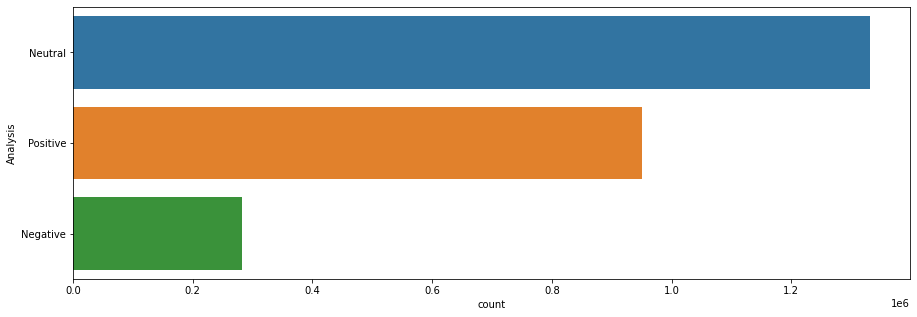

In [66]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Analysis',data = tweetsDF)
plt.show()

<h2> 3. Đọc dữ liệu bitcoin và phân theo giờ

In [8]:
btcDF_hour = pd.read_csv('../Data/Bitcoin_Price/BitCoinPrice.csv', encoding='ISO-8859-1', error_bad_lines = False, engine = 'python')

In [9]:
btcDF_hour.head(5)

,Date,Close Price
0,10/30/2017 0:00,6123.21
1,10/30/2017 1:00,6131.35
2,10/30/2017 2:00,6114.17
3,10/30/2017 3:00,6153.11
4,10/30/2017 4:00,6151.09


In [5]:
# Format lại dưới dạng datetime
btcDF_hour['Date'] = pd.to_datetime(btcDF['Date'], format='%y-%m-%d %H:%M:%S', infer_datetime_format=True)

In [10]:
btcDF_hour

,Date,Close Price
0,10/30/2017 0:00,6123.21
1,10/30/2017 1:00,6131.35
2,10/30/2017 2:00,6114.17
3,10/30/2017 3:00,6153.11
4,10/30/2017 4:00,6151.09
...,...,...
691,11/27/2017 19:00,9233.84
692,11/27/2017 20:00,9304.96
693,11/27/2017 21:00,9351.25
694,11/27/2017 22:00,9337.11


In [14]:
def parser(x):
    return datetime.strptime('%Y-%m-%d-%H-%M')
 
# read and parse data 
bitcoin_series = read_csv('../Data/Bitcoin_Price/BitCoinPrice.csv', squeeze=True, date_parser=parser)
# bitcoin_series = bitcoin_series.iloc[:, [11, 0]]
bitcoin_series.columns = ['datetime', 'price']

# set index as datetime to support plotting and Arima Model
bitcoin_series.set_index('datetime', inplace=True)
# bitcoin_series = bitcoin_series.asfreq('T')

print(bitcoin_series.head())

bitcoin_series.plot(title='Bitcoin Price')
pyplot.tight_layout()
pyplot.show()

NameError: name 'read_csv' is not defined

<h2> 4. Phân dự liệu tweet dưới dạng tổng số tweet tích cực, tiêu cực, trung lập theo 1 giờ

In [13]:
tweetsDF

,DateTime,Tweet,Subjectivity,Polarity,Analysis
0,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...,0.0000,0.00,Neutral
1,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...,0.0000,0.00,Neutral
2,2017-10-31 00:00:35,tcoin value: $6132.78,0.0000,0.00,Neutral
3,2017-10-31 00:00:35,e price of bitcoin on is now USD,0.0000,0.00,Neutral
4,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves,0.0000,0.00,Neutral
...,...,...,...,...,...
2564345,2017-11-27 17:40:36,"Now people are searching for ""buy bitcoin"" mor...",0.5000,0.50,Positive
2564346,2017-11-27 17:40:37,Daneel uses a specially developed algorithm to...,0.2125,0.05,Positive
2564347,2017-11-27 17:40:38,Be prepared to BKX . Answer about wallet you w...,0.0000,0.00,Neutral
2564348,2017-11-27 17:40:38,"Another day, another high score ! We are now l...",0.5400,0.25,Positive


In [15]:
# format dưới dạng ngày
tweetsDF['DateTime'] = pd.to_datetime(tweetsDF.DateTime, format='%Y-%m-%d')

<h3> 4.1 Thực thiện gọp các tweet trong 1 giờ lại với nhau các tweet chung 1 

In [16]:
# DateTimeStr dùng để đánh dấu tweet này trong khung giờ nào
tweetsDF['DateTimeStr'] = tweetsDF['DateTime'].dt.strftime ("%Y-%m-%d %h:%m%s")

In [17]:
tweetsDF.head(5)

,DateTime,Tweet,Subjectivity,Polarity,Analysis,DateTimeStr
0,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...,0.0,0.0,Neutral,2017-10-31 00:00:33
1,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...,0.0,0.0,Neutral,2017-10-31 00:00:34
2,2017-10-31 00:00:35,tcoin value: $6132.78,0.0,0.0,Neutral,2017-10-31 00:00:35
3,2017-10-31 00:00:35,e price of bitcoin on is now USD,0.0,0.0,Neutral,2017-10-31 00:00:35
4,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves,0.0,0.0,Neutral,2017-10-31 00:00:36


In [18]:
# Xóa phút, giây, giữ lại giờ
tweetsDF['DateTimeStr'] = tweetsDF['DateTimeStr'].str[:-5]

In [19]:
tweetsDF.head(5)

,DateTime,Tweet,Subjectivity,Polarity,Analysis,DateTimeStr
0,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...,0.0,0.0,Neutral,2017-10-31 00:
1,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...,0.0,0.0,Neutral,2017-10-31 00:
2,2017-10-31 00:00:35,tcoin value: $6132.78,0.0,0.0,Neutral,2017-10-31 00:
3,2017-10-31 00:00:35,e price of bitcoin on is now USD,0.0,0.0,Neutral,2017-10-31 00:
4,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves,0.0,0.0,Neutral,2017-10-31 00:


In [20]:
tweetsDF['DateTimeStr'] = tweetsDF['DateTimeStr'].astype(str) + '00:00'

In [21]:
# Bảng sau khi đã chia khung giờ
tweetsDF.head(5)

,DateTime,Tweet,Subjectivity,Polarity,Analysis,DateTimeStr
0,2017-10-31 00:00:33,tcoin Cash cheapest on Cryptopia BTC-market: $...,0.0,0.0,Neutral,2017-10-31 00:00:00
1,2017-10-31 00:00:34,ll Street Hedge Funds Rush to Cryptocurrencies...,0.0,0.0,Neutral,2017-10-31 00:00:00
2,2017-10-31 00:00:35,tcoin value: $6132.78,0.0,0.0,Neutral,2017-10-31 00:00:00
3,2017-10-31 00:00:35,e price of bitcoin on is now USD,0.0,0.0,Neutral,2017-10-31 00:00:00
4,2017-10-31 00:00:36,rrent Prices:1 Waves = $1 Waves = BTC$waves,0.0,0.0,Neutral,2017-10-31 00:00:00


In [ ]:
# times = pd.DatetimeIndex(tweetsDF.DateTime)
# grouped = tweetsDF.groupby(pd.Grouper(key='DateTime', freq='2H')).count()

In [ ]:
# grouped = tweetsDF.groupby(pd.Grouper(key='DateTime', freq='2H'))

<h3>4.2 Tính tổng cảm xúc tích cực, tiêu cực, phân cực của các tweet trong 1H

In [22]:
groupedNeutral = tweetsDF.groupby(pd.Grouper(key='DateTime', freq='1H'))['Analysis'].apply(lambda x: (x=='Neutral').sum()).reset_index(name='#Neutral')

In [23]:
groupedNeutral

,DateTime,#Neutral
0,2017-10-31 00:00:00,900
1,2017-10-31 01:00:00,830
2,2017-10-31 02:00:00,907
3,2017-10-31 03:00:00,913
4,2017-10-31 04:00:00,1071
...,...,...
661,2017-11-27 13:00:00,4311
662,2017-11-27 14:00:00,4230
663,2017-11-27 15:00:00,3995
664,2017-11-27 16:00:00,3934


In [24]:
groupedPositive = tweetsDF.groupby(pd.Grouper(key='DateTime', freq='1H'))['Analysis'].apply(lambda x: (x=='Positive').sum()).reset_index(name='#Positive')

In [25]:
groupedPositive

,DateTime,#Positive
0,2017-10-31 00:00:00,505
1,2017-10-31 01:00:00,549
2,2017-10-31 02:00:00,558
3,2017-10-31 03:00:00,611
4,2017-10-31 04:00:00,529
...,...,...
661,2017-11-27 13:00:00,3706
662,2017-11-27 14:00:00,3350
663,2017-11-27 15:00:00,3427
664,2017-11-27 16:00:00,3123


In [26]:
groupedNegative = tweetsDF.groupby(pd.Grouper(key='DateTime', freq='1H'))['Analysis'].apply(lambda x: (x=='Negative').sum()).reset_index(name='#Negative')

In [27]:
groupedNegative

,DateTime,#Negative
0,2017-10-31 00:00:00,108
1,2017-10-31 01:00:00,104
2,2017-10-31 02:00:00,114
3,2017-10-31 03:00:00,213
4,2017-10-31 04:00:00,187
...,...,...
661,2017-11-27 13:00:00,1087
662,2017-11-27 14:00:00,875
663,2017-11-27 15:00:00,1121
664,2017-11-27 16:00:00,896


In [28]:
grouped = pd.merge(groupedNeutral, groupedPositive, left_index=True, right_index=True)

In [29]:
grouped

,DateTime_x,#Neutral,DateTime_y,#Positive
0,2017-10-31 00:00:00,900,2017-10-31 00:00:00,505
1,2017-10-31 01:00:00,830,2017-10-31 01:00:00,549
2,2017-10-31 02:00:00,907,2017-10-31 02:00:00,558
3,2017-10-31 03:00:00,913,2017-10-31 03:00:00,611
4,2017-10-31 04:00:00,1071,2017-10-31 04:00:00,529
...,...,...,...,...
661,2017-11-27 13:00:00,4311,2017-11-27 13:00:00,3706
662,2017-11-27 14:00:00,4230,2017-11-27 14:00:00,3350
663,2017-11-27 15:00:00,3995,2017-11-27 15:00:00,3427
664,2017-11-27 16:00:00,3934,2017-11-27 16:00:00,3123


In [30]:
grouped = pd.merge(grouped, groupedNegative, left_index=True, right_index=True)

In [31]:
grouped

,DateTime_x,#Neutral,DateTime_y,#Positive,DateTime,#Negative
0,2017-10-31 00:00:00,900,2017-10-31 00:00:00,505,2017-10-31 00:00:00,108
1,2017-10-31 01:00:00,830,2017-10-31 01:00:00,549,2017-10-31 01:00:00,104
2,2017-10-31 02:00:00,907,2017-10-31 02:00:00,558,2017-10-31 02:00:00,114
3,2017-10-31 03:00:00,913,2017-10-31 03:00:00,611,2017-10-31 03:00:00,213
4,2017-10-31 04:00:00,1071,2017-10-31 04:00:00,529,2017-10-31 04:00:00,187
...,...,...,...,...,...,...
661,2017-11-27 13:00:00,4311,2017-11-27 13:00:00,3706,2017-11-27 13:00:00,1087
662,2017-11-27 14:00:00,4230,2017-11-27 14:00:00,3350,2017-11-27 14:00:00,875
663,2017-11-27 15:00:00,3995,2017-11-27 15:00:00,3427,2017-11-27 15:00:00,1121
664,2017-11-27 16:00:00,3934,2017-11-27 16:00:00,3123,2017-11-27 16:00:00,896


In [32]:
grouped= grouped.drop(['DateTime_y', 'DateTime'], axis=1)

In [33]:
grouped

,DateTime_x,#Neutral,#Positive,#Negative
0,2017-10-31 00:00:00,900,505,108
1,2017-10-31 01:00:00,830,549,104
2,2017-10-31 02:00:00,907,558,114
3,2017-10-31 03:00:00,913,611,213
4,2017-10-31 04:00:00,1071,529,187
...,...,...,...,...
661,2017-11-27 13:00:00,4311,3706,1087
662,2017-11-27 14:00:00,4230,3350,875
663,2017-11-27 15:00:00,3995,3427,1121
664,2017-11-27 16:00:00,3934,3123,896


<h2>5. Gộp 2 bảng giá bitcoin và tweet lại với nhau

In [40]:
# Gộp 2 bảng với cột gộp bên grouped là "DateTime_x" và cột gộp bên btcDF_hour là "Date" 
tweet_bitcoin = pd.merge(grouped, btcDF_hour,left_on='DateTime_x', right_on='Date')

In [41]:
tweet_bitcoin

,DateTime_x,#Neutral,#Positive,#Negative,Date,#Close Price
0,2017-10-31 00:00:00,900,505,108,2017-10-31 00:00:00,6142.46
1,2017-10-31 01:00:00,830,549,104,2017-10-31 01:00:00,6139.47
2,2017-10-31 02:00:00,907,558,114,2017-10-31 02:00:00,6128.20
3,2017-10-31 03:00:00,913,611,213,2017-10-31 03:00:00,6130.72
4,2017-10-31 04:00:00,1071,529,187,2017-10-31 04:00:00,6143.92
...,...,...,...,...,...,...
661,2017-11-27 13:00:00,4311,3706,1087,2017-11-27 13:00:00,8990.26
662,2017-11-27 14:00:00,4230,3350,875,2017-11-27 14:00:00,8994.28
663,2017-11-27 15:00:00,3995,3427,1121,2017-11-27 15:00:00,9118.07
664,2017-11-27 16:00:00,3934,3123,896,2017-11-27 16:00:00,9282.29


In [42]:
tweet_bitcoin = tweet_bitcoin.drop(['Date'], axis=1)
tweet_bitcoin

,DateTime_x,#Neutral,#Positive,#Negative,#Close Price
0,2017-10-31 00:00:00,900,505,108,6142.46
1,2017-10-31 01:00:00,830,549,104,6139.47
2,2017-10-31 02:00:00,907,558,114,6128.20
3,2017-10-31 03:00:00,913,611,213,6130.72
4,2017-10-31 04:00:00,1071,529,187,6143.92
...,...,...,...,...,...
661,2017-11-27 13:00:00,4311,3706,1087,8990.26
662,2017-11-27 14:00:00,4230,3350,875,8994.28
663,2017-11-27 15:00:00,3995,3427,1121,9118.07
664,2017-11-27 16:00:00,3934,3123,896,9282.29


In [43]:
tweet_bitcoin.columns = ['DateTime','Neutral','Positive','Negative','Average price']
tweet_bitcoin

,DateTime,Neutral,Positive,Negative,Average price
0,2017-10-31 00:00:00,900,505,108,6142.46
1,2017-10-31 01:00:00,830,549,104,6139.47
2,2017-10-31 02:00:00,907,558,114,6128.20
3,2017-10-31 03:00:00,913,611,213,6130.72
4,2017-10-31 04:00:00,1071,529,187,6143.92
...,...,...,...,...,...
661,2017-11-27 13:00:00,4311,3706,1087,8990.26
662,2017-11-27 14:00:00,4230,3350,875,8994.28
663,2017-11-27 15:00:00,3995,3427,1121,9118.07
664,2017-11-27 16:00:00,3934,3123,896,9282.29


<h2> phương pháp Hồi quy tuyến tính đa biến (MLR) để đánh giá bài toán

In [210]:
MLR_df = tweet_bitcoin.drop(['DateTime'], axis = 1)

In [211]:
MLR_df

,Neutral,Positive,Negative,Average price
0,900,505,108,6142.46
1,830,549,104,6139.47
2,907,558,114,6128.20
3,913,611,213,6130.72
4,1071,529,187,6143.92
...,...,...,...,...
597,4311,3706,1087,8990.26
598,4230,3350,875,8994.28
599,3995,3427,1121,9118.07
600,3934,3123,896,9282.29


In [212]:
# Tách dữ liệu thành 2 phần --- phần 1: dữ liệu bình thường (feature), phần 2: dữ liệu chứa thuộc tính quyết định
x = MLR_df.drop(['Average price'], axis = 1).values
y = MLR_df['Average price'].values

In [213]:
print(x)

[[ 900  505  108]
 [ 830  549  104]
 [ 907  558  114]
 ...
 [3995 3427 1121]
 [3934 3123  896]
 [2502 2428  438]]


In [214]:
x

array([[ 900,  505,  108],
       [ 830,  549,  104],
       [ 907,  558,  114],
       ...,
       [3995, 3427, 1121],
       [3934, 3123,  896],
       [2502, 2428,  438]], dtype=int64)

In [215]:
print(y)

[6142.46 6139.47 6128.2  6130.72 6143.92 6158.76 6105.9  6094.36 6125.13
 6165.   6170.77 6233.74 6201.03 6332.34 6363.13 6365.16 6364.78 6361.79
 6335.64 6341.15 6370.08 6393.26 6383.94 6448.36 6376.49 6405.67 6419.6
 6426.88 6365.63 6399.43 6400.97 6392.6  6446.61 6541.77 6584.45 6568.
 6509.08 6484.66 6547.65 6556.74 6587.46 6604.57 6585.55 6615.47 6568.12
 6587.57 6663.25 6743.06 6827.61 6835.46 6814.19 6877.79 6860.46 6862.07
 6971.25 6939.93 6976.82 6991.19 7180.51 6971.36 6975.91 7126.46 7005.08
 7075.9  6965.58 6990.96 6873.09 6972.15 7056.2  7083.6  7022.01 7029.98
 6993.33 6994.66 7043.31 7195.12 7212.95 7233.02 7209.35 7322.47 7412.44
 7371.65 7406.72 7301.49 7321.09 7240.45 7280.07 7351.53 7299.47 7290.6
 7334.57 7276.77 7249.52 7145.95 7207.76 7197.37 7097.96 7077.95 7182.54
 7228.34 7255.67 7203.43 7187.34 7240.15 7165.93 7143.41 7173.87 7152.55
 7189.26 7313.96 7300.69 7332.16 7352.03 7342.51 7343.8  7422.15 7454.26
 7457.12 7410.72 7375.09 7343.74 7399.86 7375.74 7409.6

In [236]:
#Chia dữ liệu test và train theo tỉ lệ train:test = 90:10 với test_size = 10%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [237]:
print(x_train)

[[1735  988  212]
 [1326  861  234]
 [2060 1236  419]
 ...
 [1831 1333  324]
 [1627  889  294]
 [2190 1317  771]]


In [238]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [239]:
y_pred = ml.predict(x_test)
print(y_pred)

[7269.21459788 6640.8418324  8238.50241291 6939.48614469 7663.69413395
 7328.33157716 7155.83453618 7540.71923587 7450.74527916 7188.99638066
 7021.72104505 7376.02590151 7616.40256043 7973.21550524 7093.12760319
 7119.02226934 7043.34440346 8761.60460236 7199.09519109 7104.5541857
 7851.32395948 7361.52117535 7473.04597331 7372.96289482 7996.7971048
 7155.68180885 7318.60346658 8176.4891336  8211.87659352 7169.83944807
 6837.83555993 8021.4965704  7296.44899737 6790.9826424  7409.13539309
 7559.86288734 7241.43145843 7116.75560561 8339.82310912 8077.85331373
 7430.05051259 7083.0767888  7586.25966018 7336.47111224 7968.23767409
 6791.29499924 7365.37108835 6729.66242478 7270.61883292 7476.76533476
 7443.761155   6953.9952557  7238.06219104 6975.78310449 8152.6400294
 7405.67733123 7504.81891293 6910.70825141 8150.21990116 7537.5144533
 8905.31318411]


In [240]:
ml.predict([[900,505,108]])

array([6722.25008232])

In [241]:
# Tính toán giá trị r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4020894863705371

In [221]:
# Lập bảng chênh lệch giữa giá thực tế với giá dự đoán
pred_y_df = pd.DataFrame({'Actual:':y_test,'Predict price:':y_pred,'Different:':y_test-y_pred})
pred_y_df

,Actual:,Predict price:,Different:
0,6743.28,7270.223720,-526.943720
1,6860.46,6615.814086,244.645914
2,8219.29,8249.779108,-30.489108
3,7312.77,6969.912347,342.857653
4,6561.55,7640.933233,-1079.383233
...,...,...,...
176,7709.40,6396.047980,1313.352020
177,8965.01,7698.200555,1266.809445
178,7134.47,7379.274642,-244.804642
179,8211.93,8424.729341,-212.799341


<h3>Với R2-score ở trên ta suy ra rằng giá Bitcoin không bị ảnh hưởng nhiều bởi cảm xúc của các bài Tweet